In [1]:
import pandas as pd
from visualization import *
from data_loader import data_loader

In [2]:
data = data_loader(num=100000)

Loading data...
processed_data.csv does not exist. Loading data from original file.


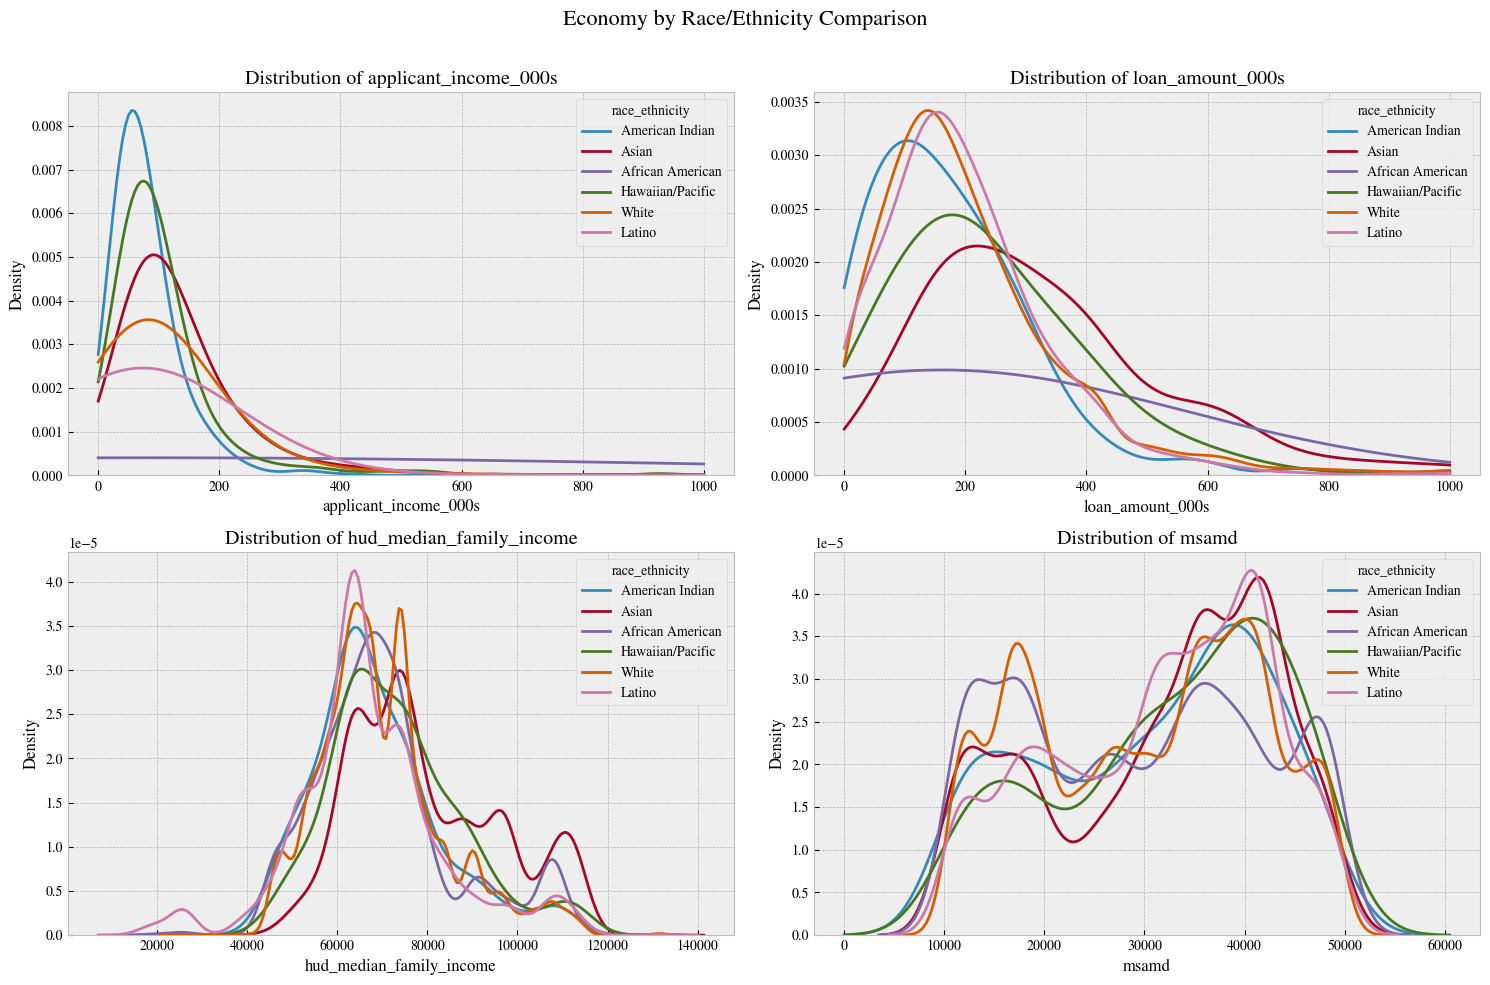

In [3]:
groups = [1, 2, 3, 4, 5, 9]
group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income', 'msamd']

plot_density_differences(data, "race_ethnicity", groups, group_labels, features, title="Economy by Race/Ethnicity Comparison")

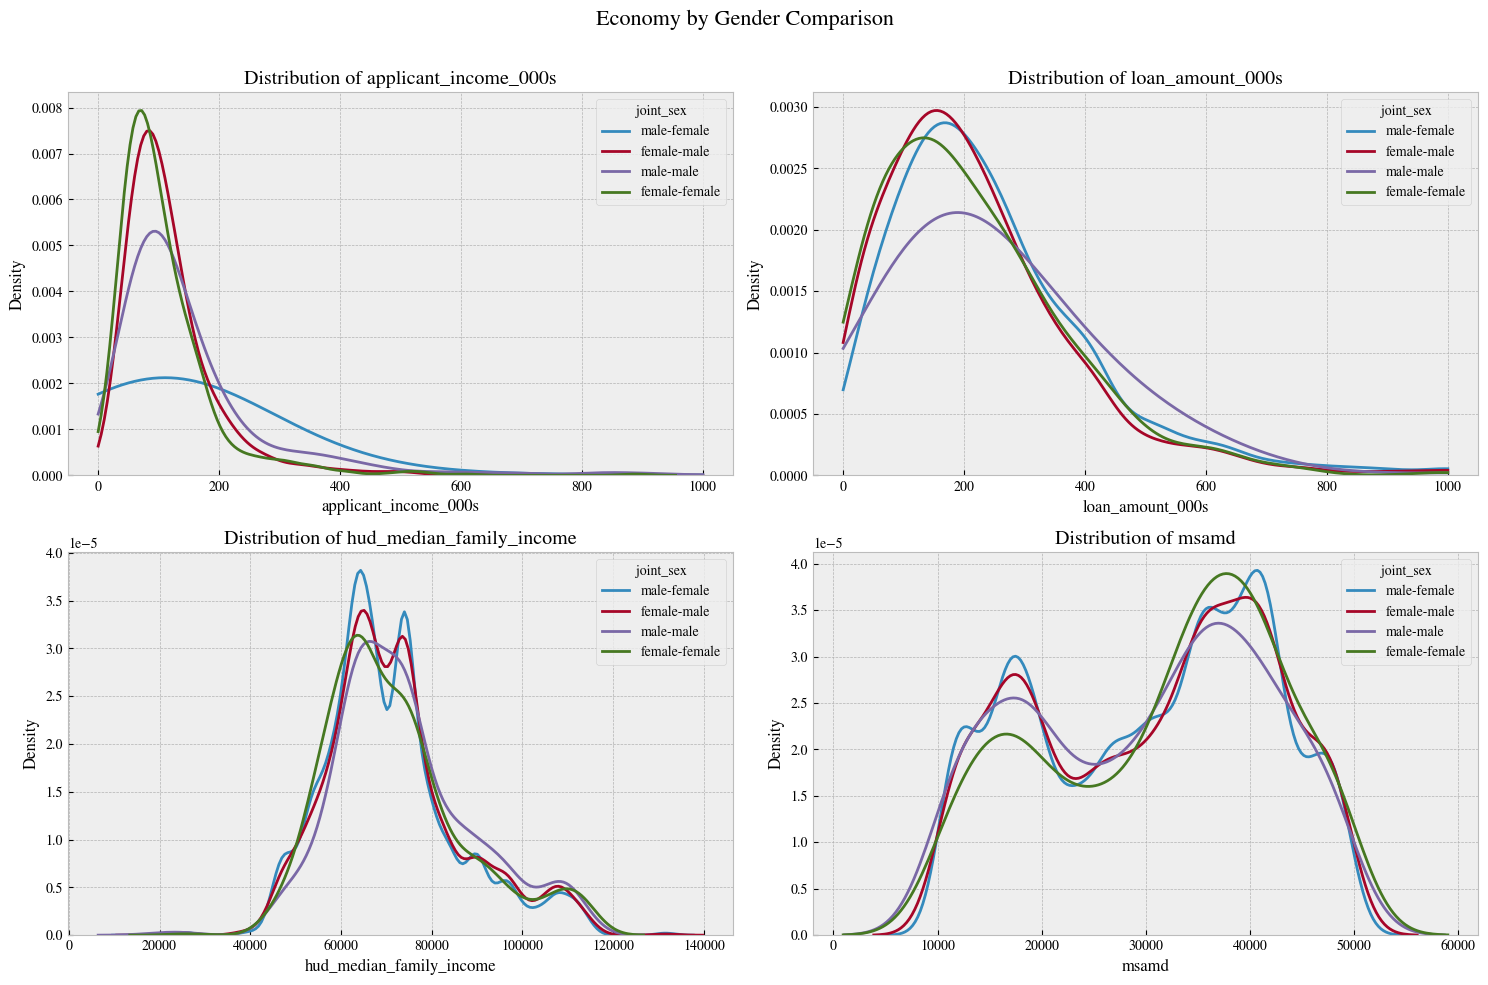

In [5]:
groups = ['1_2', '2_1', '1_1', '2_2']
group_labels = ["male-female", "female-male", "male-male", "female-female"]
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income', 'msamd']

plot_density_differences(data, "joint_sex", groups, group_labels, features, title="Economy by Gender Comparison")

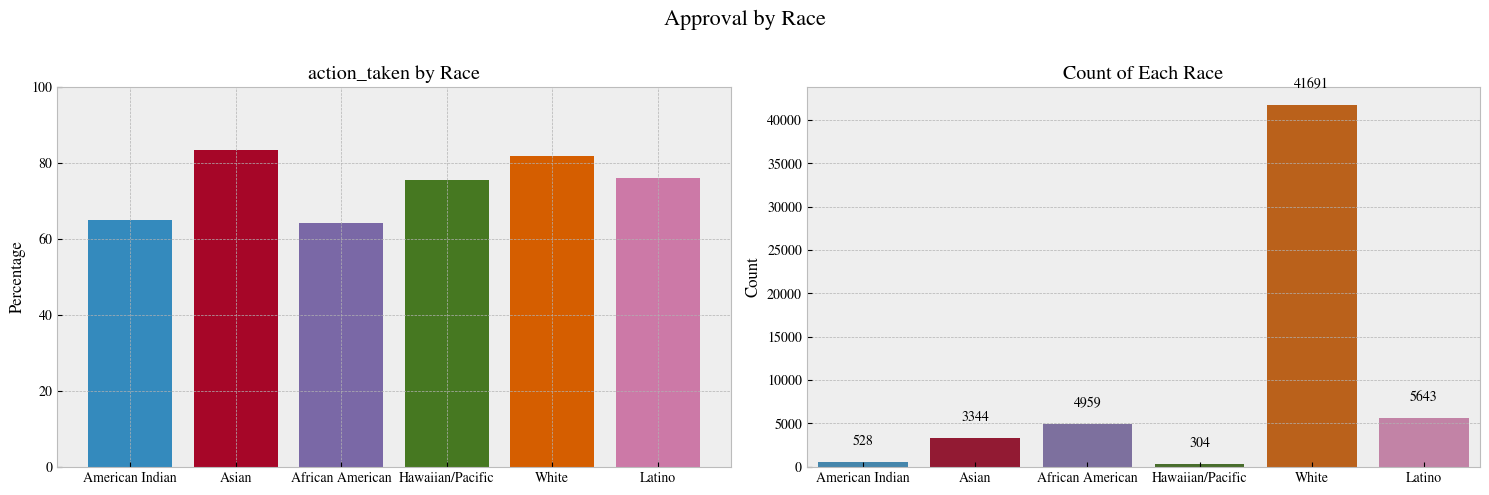

In [6]:
groups = [1, 2, 3, 4, 5, 9]
group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]
features = ['action_taken']

plot_histogram_differences(data, 'race_ethnicity', 'action_taken', groups, group_labels, features, title='Approval by Race')

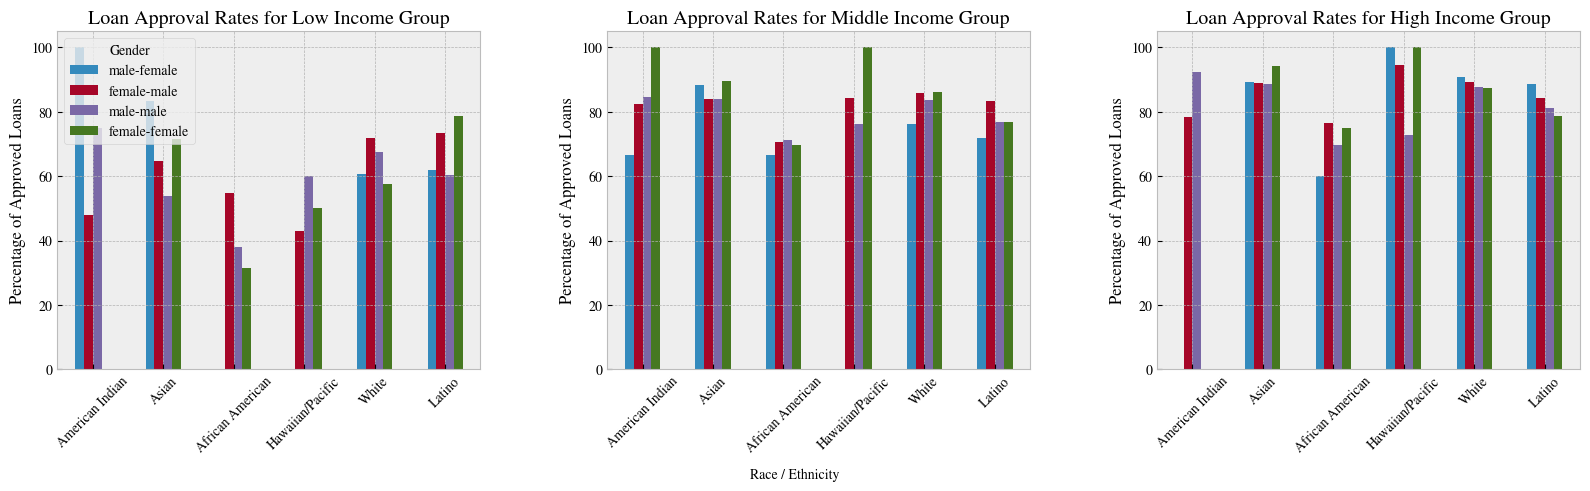

In [7]:
approval_rates(data)

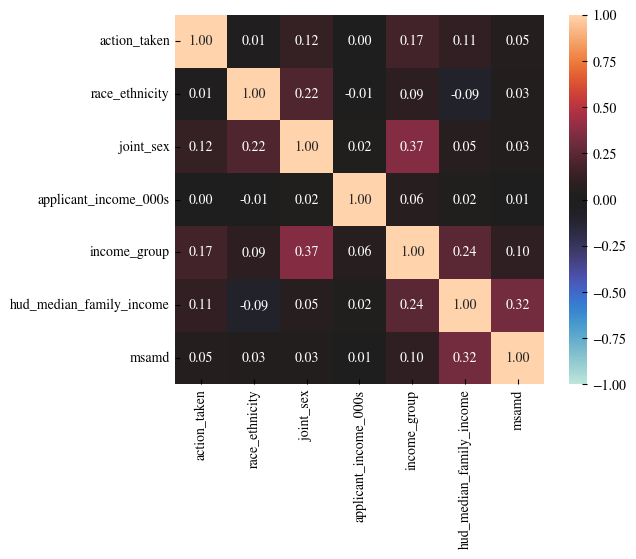

In [8]:
subset = data[["action_taken", "race_ethnicity", "joint_sex", "applicant_income_000s", "income_group", "hud_median_family_income", "msamd"]]
associations_df = associations(subset)